<a href="https://colab.research.google.com/github/ucfilho/AI/blob/main/AI_2023/ANN_regression/Mn_remove_PCA_exploratory_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

In [2]:
!git clone https://github.com/ucfilho/Machine_Learning_DataSet
%cd Machine_Learning_DataSet

fatal: destination path 'Machine_Learning_DataSet' already exists and is not an empty directory.
/content/Machine_Learning_DataSet


In [3]:
df=pd.read_excel("remove_Mn.xlsx")
print(df.head())

    tipo  D2EHPA  time  H2SO4  NaCl  EDTA    Mn
0  train    0.08     4    0.4     8    12   6.0
1  train    0.16     4    0.4     8     4  20.0
2  train    0.08     8    0.4     8     4  13.0
3  train    0.16     8    0.4     8    12   7.0
4   test    0.08     4    0.8     8     4  25.0


In [4]:
# https://plotly.com/python/pca-visualization/

In [5]:
X = df.drop(['tipo'],axis=1)
features = X.columns

pca = PCA(n_components=2)
components = pca.fit_transform(X)

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

fig = px.scatter()

for i, feature in enumerate(features):
    fig.add_annotation(
        ax=0, ay=0,
        axref="x", ayref="y",
        x=loadings[i, 0],
        y=loadings[i, 1],
        showarrow=True,
        arrowsize=2,
        arrowhead=2,
        xanchor="right",
        yanchor="top"
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
        yshift=5,
    )
fig.show()

In [6]:
fig = px.scatter(components, x=0, y=1, color=df['species'])



array([[-3.99140414e+00,  8.11929523e+00],
       [-1.37096365e+01, -4.14570553e+00],
       [-9.04303953e+00,  1.00513018e+00],
       [-4.57469868e+00,  7.65956454e+00],
       [-1.69915319e+01, -7.65671789e+00],
       [-8.58580205e+00,  3.20555136e+00],
       [ 1.81839191e-02,  1.25642220e+01],
       [-7.73135398e+00,  2.40313865e+00],
       [ 7.50020281e+00, -4.58307581e+00],
       [ 1.19685437e+01,  2.07135855e+00],
       [ 1.20415202e+01,  2.31305354e+00],
       [ 1.15105287e+01, -1.33665796e-01],
       [ 9.34287982e+00, -7.38348004e-01],
       [ 5.53073089e+00, -6.69159642e+00],
       [ 8.22863340e+00, -3.64467816e+00],
       [ 8.75958528e+00, -1.19807869e+00],
       [ 4.78045785e-01,  4.84073963e-01],
       [-4.11561426e+00, -4.42518662e+00],
       [ 3.02999523e+00,  3.04760223e+00],
       [-7.61480249e-01, -6.76962543e-01],
       [ 5.72863561e+00,  6.09900377e+00],
       [-8.70997259e+00, -9.33881061e+00],
       [-1.22007841e+01,  1.00384198e+01],
       [ 1.

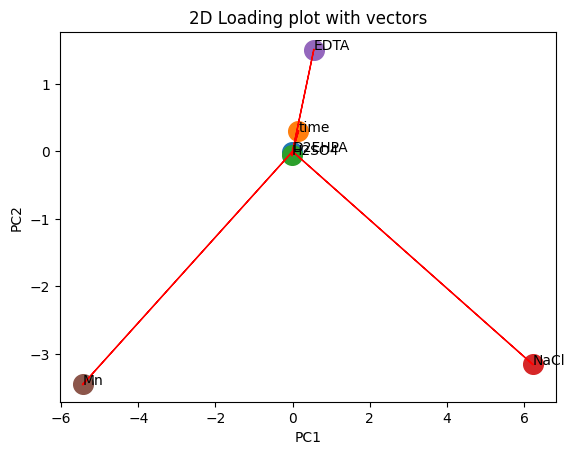

In [7]:
import matplotlib.pyplot as plt
# https://www.jcchouinard.com/pca-with-python/

# Get the loadings of x and y axes
xs = loadings[:,0]
ys = loadings[:,1]
feature_names = X.columns

# Plot the loadings on a scatterplot
for i, varnames in enumerate(feature_names):
    plt.scatter(xs[i], ys[i], s=200)
    plt.arrow(
        0, 0, # coordinates of arrow base
        xs[i], # length of the arrow along x
        ys[i], # length of the arrow along y
        color='r',
        head_width=0.01
        )
    plt.text(xs[i], ys[i], varnames)

# Define the axes
#xticks = np.linspace(-0.8, 0.8, num=5)
#yticks = np.linspace(-0.8, 0.8, num=5)
#plt.xticks(xticks)
#plt.yticks(yticks)
plt.xlabel('PC1')
plt.ylabel('PC2')

# Show plot
plt.title('2D Loading plot with vectors')
plt.show()

In [9]:
!pip install pca

In [ ]:
# https://towardsdatascience.com/what-are-pca-loadings-and-biplots-9a7897f2e559

[pca] >n_components is set to 5
[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed on the [6] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


,PC,feature,loading,type
0,PC1,Mn,0.717893,best
1,PC2,H2SO4,0.794827,best
2,PC3,D2EHPA,-0.941271,best
3,PC4,time,0.862844,best
4,PC5,EDTA,0.676696,best
5,PC2,NaCl,0.567428,weak


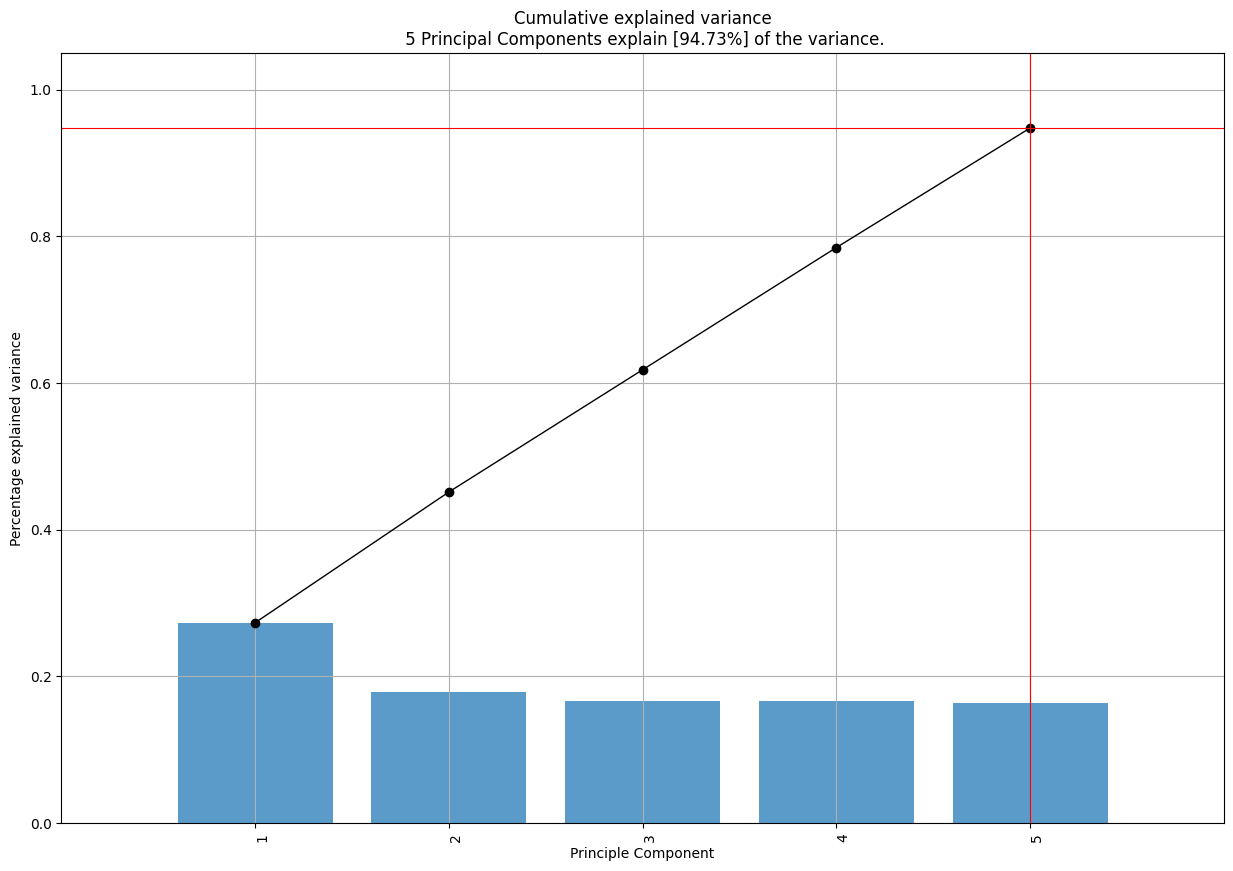

In [11]:
from pca import pca
# Initialize with normalization
X = df.drop(['tipo'],axis=1)

model = pca(normalize=True, n_components=None)

# Fit transform with dataframe
results = model.fit_transform(X)

# The fit transform can also be done with an array and include the column labels and row labels
# results = model.fit_transform(X, col_labels=labels, row_labels=y)

# [pca] >n_components is set to 12
# [pca] >Processing dataframe..
# [pca] >Normalizing input data per feature (zero mean and unit variance)..
# [pca] >The PCA reduction is performed on the [13] columns of the input dataframe.
# [pca] >Fit using PCA.
# [pca] >Compute loadings and PCs.
# [pca] >Compute explained variance.
# [pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[12]
# [pca] >Outlier detection using SPE/DmodX with n_std=[2]

# Scree plot with explained variance
model.plot()

# Top performing features
model.results['topfeat']


[pca] >Plot PC1 vs PC2 with loadings.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '5 Principal Components explain [94.73%] of the variance'}, xlabel='PC1 (27.2% expl.var)', ylabel='PC2 (17.8% expl.var)'>)

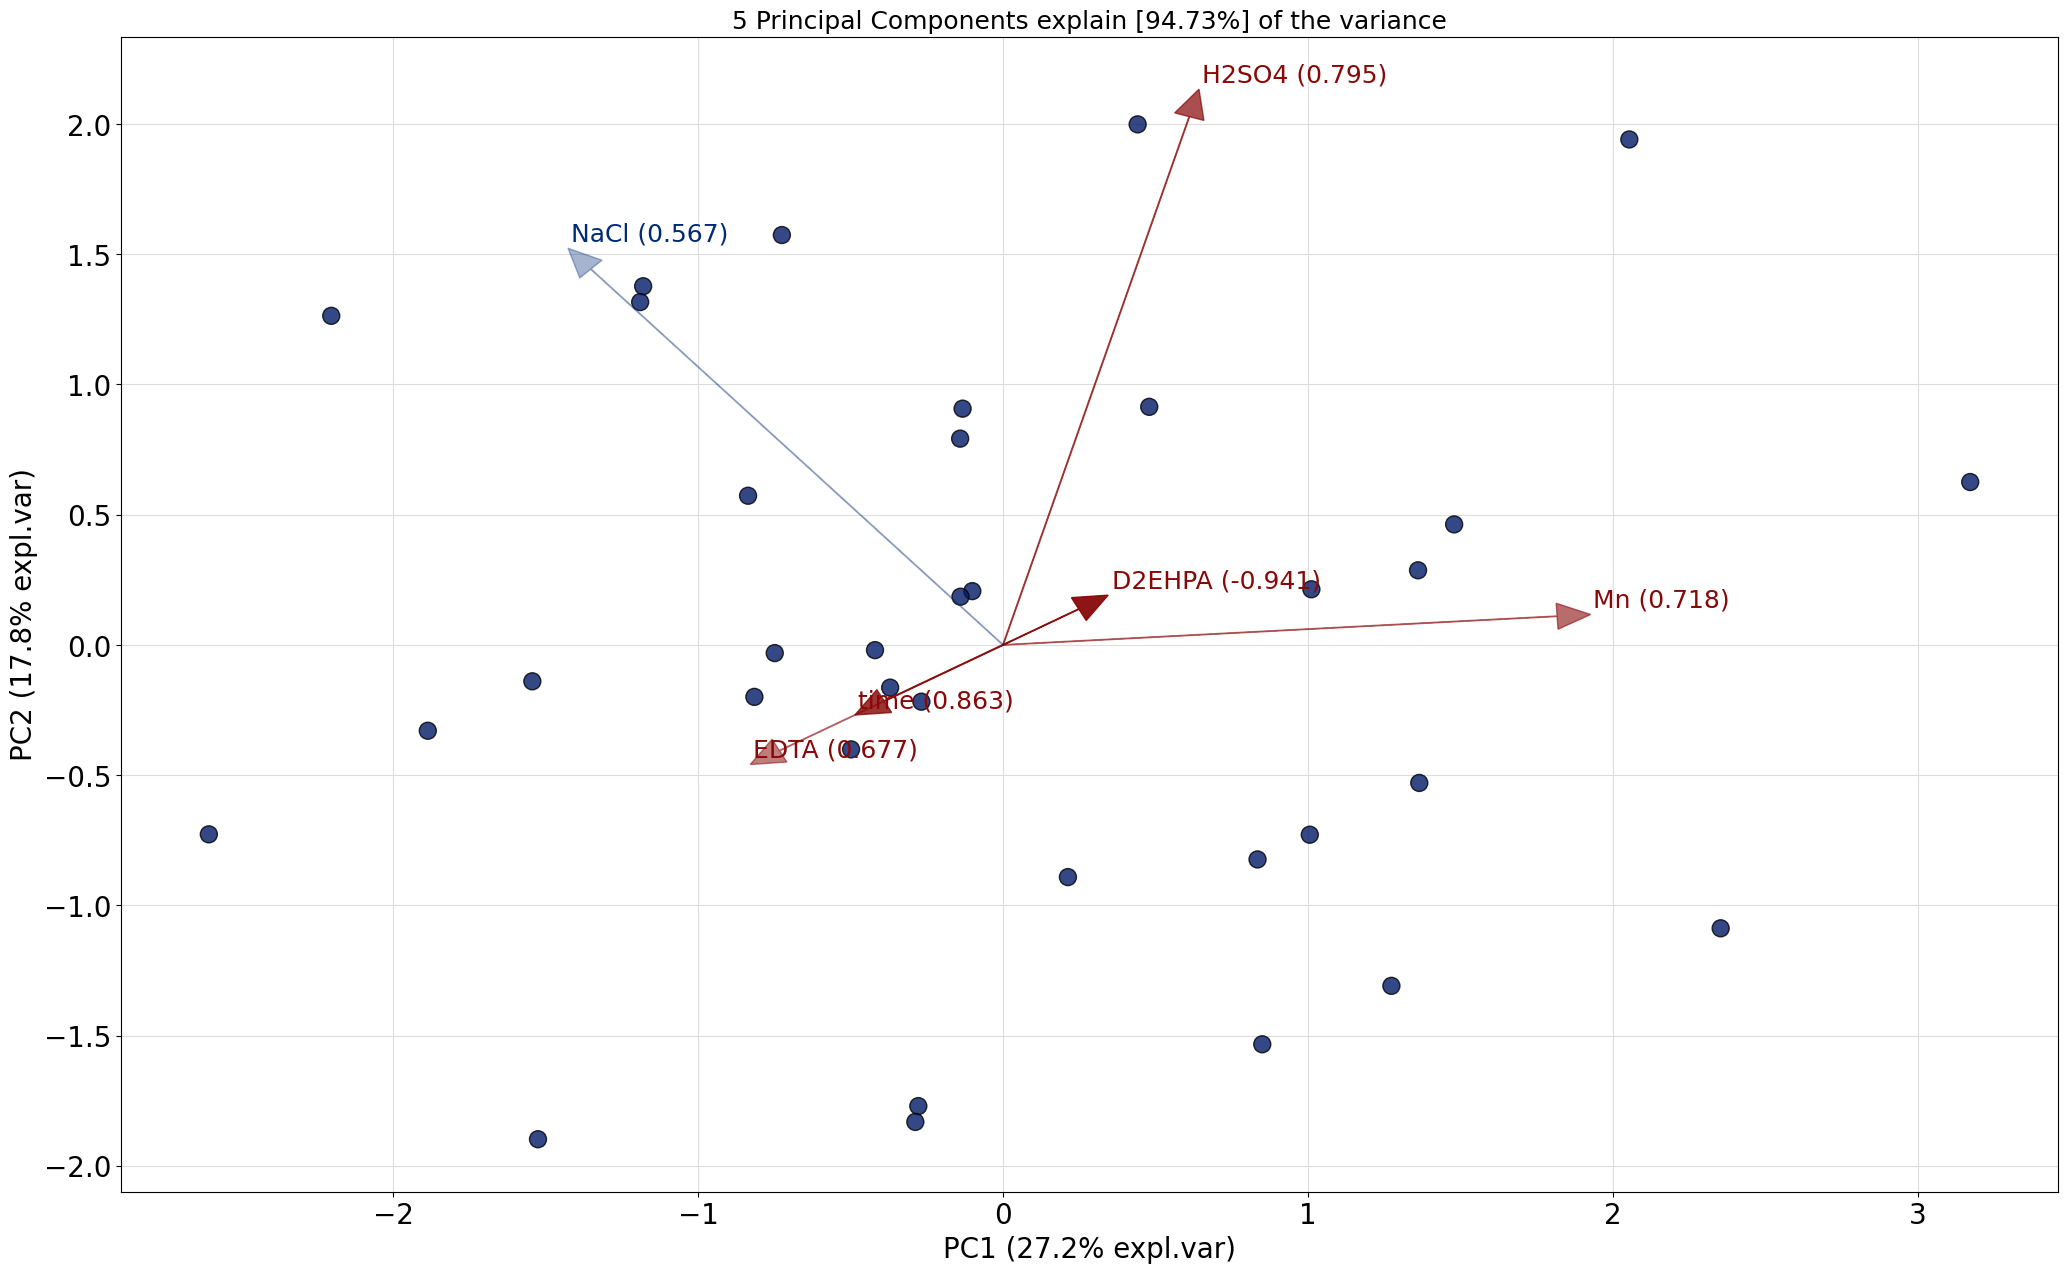

In [13]:
# 2D plot with samples colored on color_intensity
model.biplot( legend=False, cmap='seismic')